In [13]:
from skimage.filters import sobel_h, gaussian
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from skimage import io, color, feature, transform
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load and preprocess the image

horizon_image = io.imread('yellow_horizon.jpg') # Replace with the correct path
gray_horizon = color.rgb2gray(horizon_image)

(-0.5, 255.5, 170.5, -0.5)

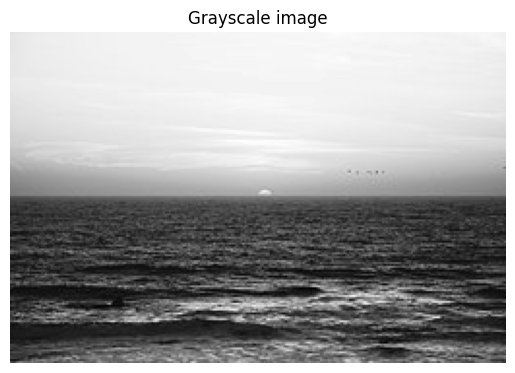

In [11]:
plt.imshow(gray_horizon, cmap='gray')
plt.title('Grayscale image')
plt.axis('off')

(-0.5, 255.5, 170.5, -0.5)

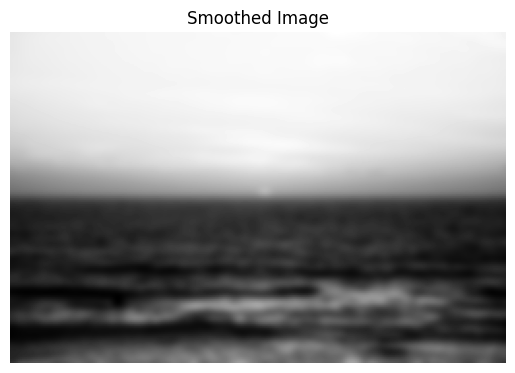

In [10]:
# Apply Gaussian smoothing to reduce noise
smoothed_image = gaussian(gray_horizon, sigma=2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')

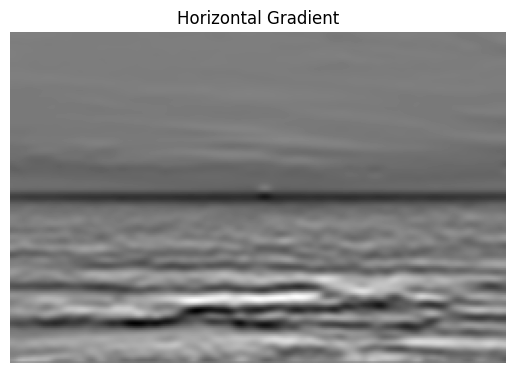

In [12]:
# Apply horizontal Sobel filter
sobel_image = sobel_h(smoothed_image)
plt.imshow(sobel_image, cmap='gray')
plt.title('Horizontal Gradient')
plt.axis('off')
plt.show()

In [15]:
# Find candidate points for RANSAC
height, width = sobel_image.shape
vertical_slices = np.linspace(0, width - 1, 20, dtype=int)
candidate_points = []

In [16]:
for x in vertical_slices:
    y = np.argmin(sobel_image[:, x]) # Find the minimum gradient along the column
    candidate_points.append([x, y])

candidate_points = np.array(candidate_points)

In [18]:
# Fit a line using RANSAC
ransac = RANSACRegressor(estimator=LinearRegression(), min_samples=2, residual_threshold=5, max_trials=100)
ransac.fit(candidate_points[:, 0].reshape(-1, 1), candidate_points[:, 1])


RANSACRegressor(estimator=LinearRegression(), min_samples=2,
                residual_threshold=5)

In [19]:
# Extract the line parameters
slope = ransac.estimator_.coef_[0]
intercept = ransac.estimator_.intercept_

In [20]:
# Plot the original image with the detected line
x_range = np.arange(0, width)
y_range = slope * x_range + intercept

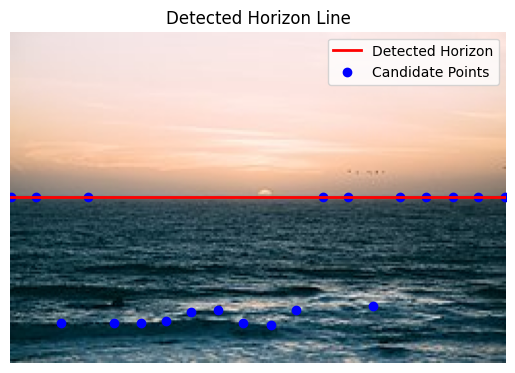

In [21]:
plt.imshow(horizon_image, cmap='gray')
plt.plot(x_range, y_range, color='red', linewidth=2, label='Detected Horizon')
plt.scatter(candidate_points[:, 0], candidate_points[:, 1], color='blue', label='Candidate Points')
plt.legend()
plt.axis('off')
plt.title('Detected Horizon Line')
plt.show()

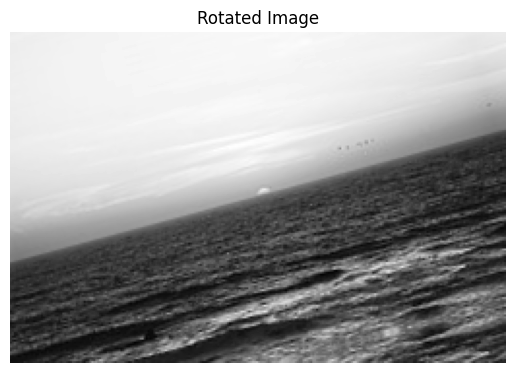

In [23]:
# Rotate the image and test horizon detection
rotated_image = transform.rotate(gray_horizon, angle=15, mode='reflect')
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image")
plt.axis('off')
plt.show()